![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

# Pandas Mission

"*To provide high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [2]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)

# References and Links

- [Pandas website](http://pandas.pydata.org).
- *Python for Data Analysis* by Wes McKinney ([O'Reilly Media](http://shop.oreilly.com/product/0636920023784.do)).
- [Analyzing and Manipulating Data with Pandas Beginner](https://youtu.be/6ohWS7J1hVA) | SciPy 2016 Tutorial | Jonathan Rocher.


In [1]:
import pandas as pd
url = "https://www.fun-mooc.fr/c4x/agrocampusouest/40001S03/asset/AnaDo_JeuDonnees_TemperatFrance.csv"
df = pd.read_csv(url, delimiter=";", encoding="latin1", index_col=0)
df

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE


In [3]:
df.index

Index(['Bordeaux', 'Brest', 'Clermont', 'Grenoble', 'Lille', 'Lyon',
       'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris', 'Rennes',
       'Strasbourg', 'Toulouse', 'Vichy'],
      dtype='object')

In [5]:
import toyplot
canvas = toyplot.Canvas(width=600, height=300)
axes = canvas.cartesian(xlabel="Latitude", ylabel=u"Temperature \u00b0C")
for lati, moye, ville in zip(df['Lati'],df["Moye"],df['Ville']):
    axes.text(lati, moye, ville, style={"-toyplot-anchor-shift":"10px","text-anchor":"start","font-size":"14px"})
    axes.scatterplot(lati,moye, color="black")


Bordeaux Brest Clermont Grenoble Lille Lyon Marseille Montpellier Nantes Nice Paris Rennes Strasbourg Toulouse Vichy 42 45 48 50 Latitude 9 11 13 15 Temperature °C

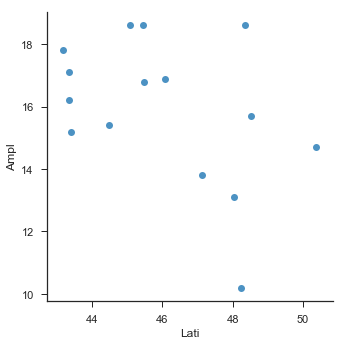

In [11]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('Lati', 'Ampl', data=df, fit_reg=False)

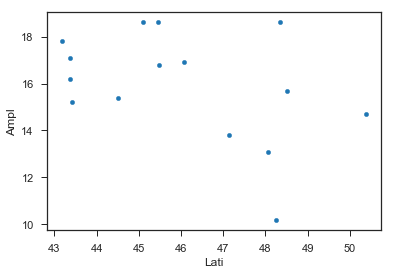

In [19]:
df.plot.scatter('Lati','Ampl')
